In [27]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
origin = read_excel("https://data.hossam.kr/F03/pima-indians.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
origin['Outcome'] = origin['Outcome'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [31]:
origin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


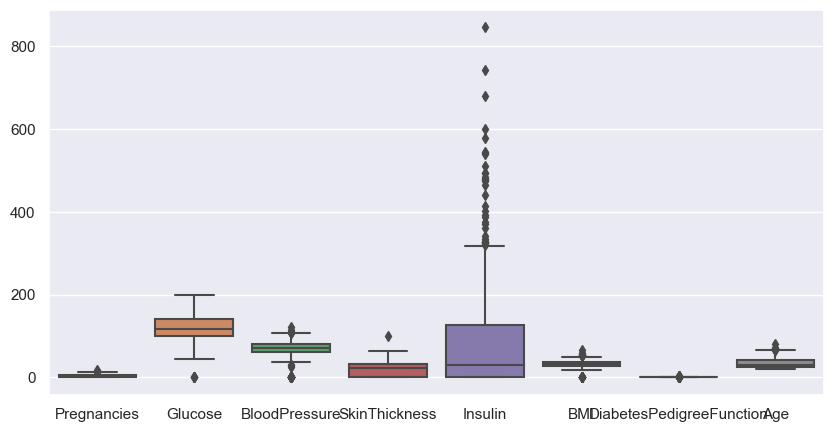

In [32]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

In [33]:
np.random.seed(777)

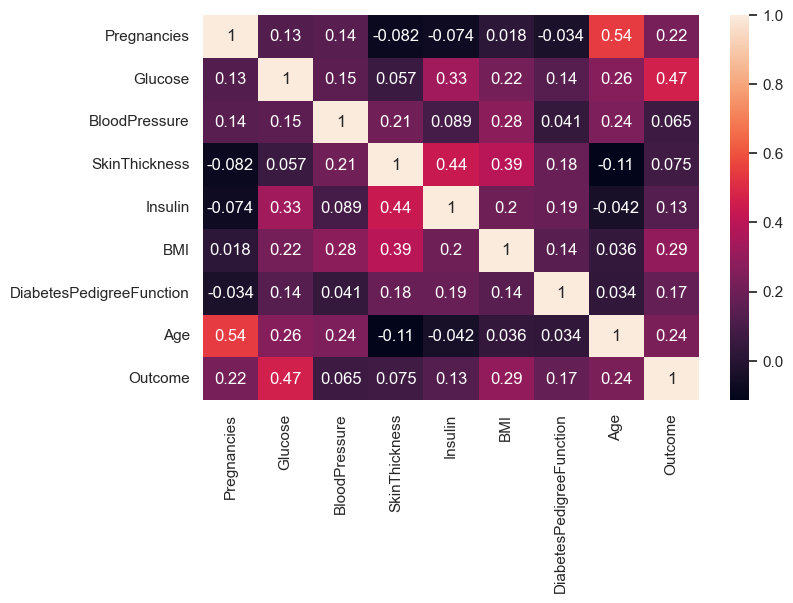

In [34]:
df = origin.copy()
plt.figure(figsize=(8,5))
sb.set(font_scale=1.0)
sb.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [35]:
x = origin[['Age', 'BMI', 'Glucose', 'Pregnancies']]
y = origin[['Outcome']]
x.shape, y.shape

((768, 4), (768, 1))

In [36]:
from sklearn.preprocessing import StandardScaler
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
print(x_scale.shape)
x_scale

(768, 4)


array([[ 1.4259954 ,  0.20401277,  0.84832379,  0.63994726],
       [-0.19067191, -0.68442195, -1.12339636, -0.84488505],
       [-0.10558415, -1.10325546,  1.94372388,  1.23388019],
       ...,
       [-0.27575966, -0.73518964,  0.00330087,  0.3429808 ],
       [ 1.17073215, -0.24020459,  0.1597866 , -0.84488505],
       [-0.87137393, -0.20212881, -0.8730192 , -0.84488505]])

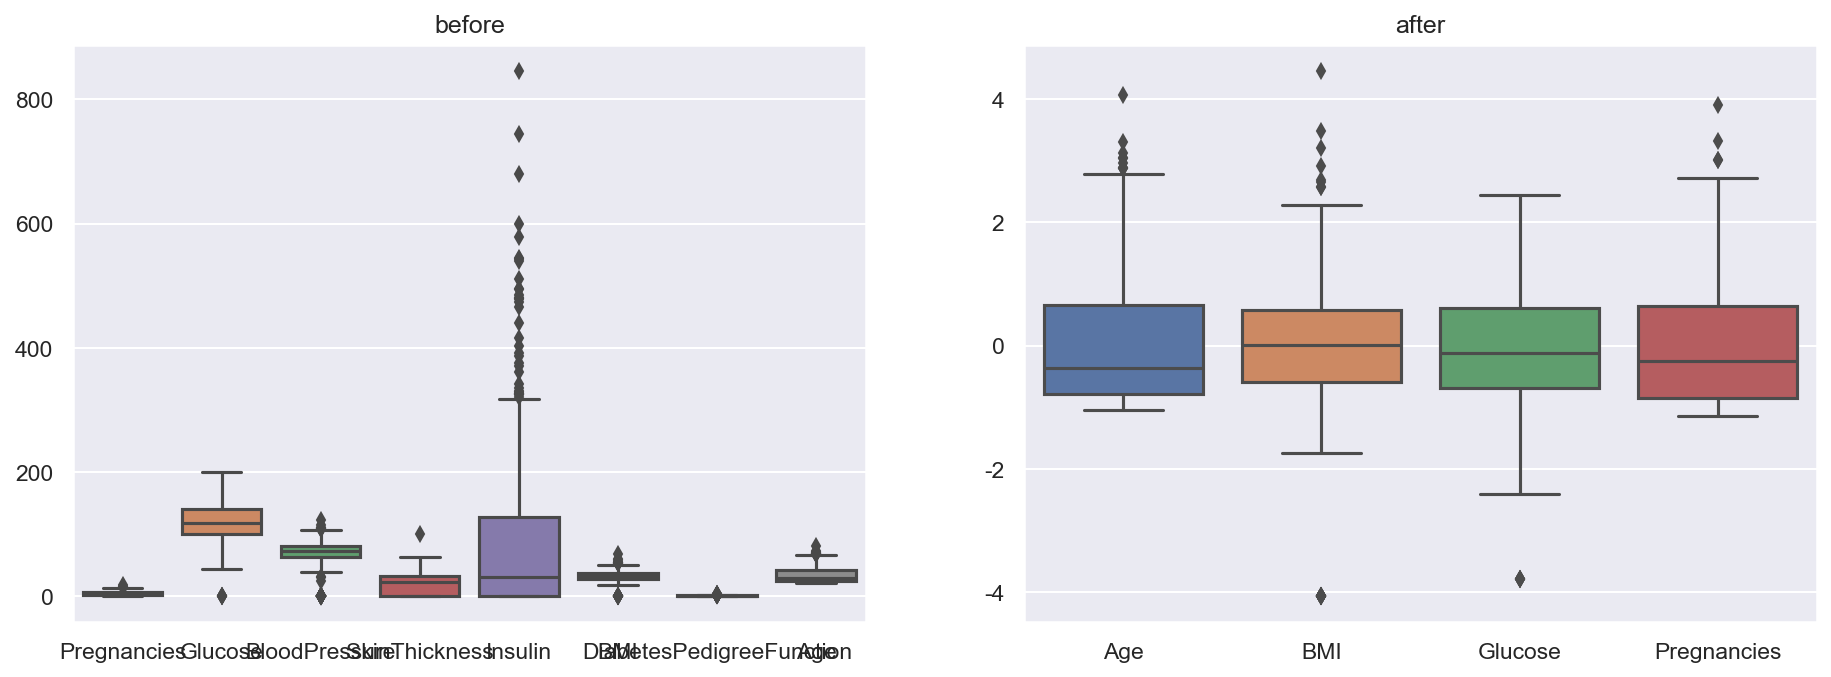

In [37]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['Age','BMI','Glucose', 'Pregnancies'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=x_scale_df, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 4), (231, 4), (537, 1), (231, 1))

In [39]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                320       
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
17/17 [==============================] - 1s 9ms/step - loss: 0.6954 - acc: 0.5196 - val_loss: 0.6545 - val_acc: 0.6450 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6292 - acc: 0.7002 - val_loss: 0.5975 - val_acc: 0.7922 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5879 - acc: 0.7561 - val_loss: 0.5583 - val_acc: 0.8009 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5558 - acc: 0.7579 - val_loss: 0.5275 - val_acc: 0.7965 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5310 - acc: 0.7616 - val_loss: 0.5055 - val_acc: 0.7965 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5131 - acc: 0.7691 - val_loss: 0.4891 - val_acc: 0.7879 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5000 - acc: 0.7635 - val_loss: 0.4796 - val_acc: 0.7879 - lr:

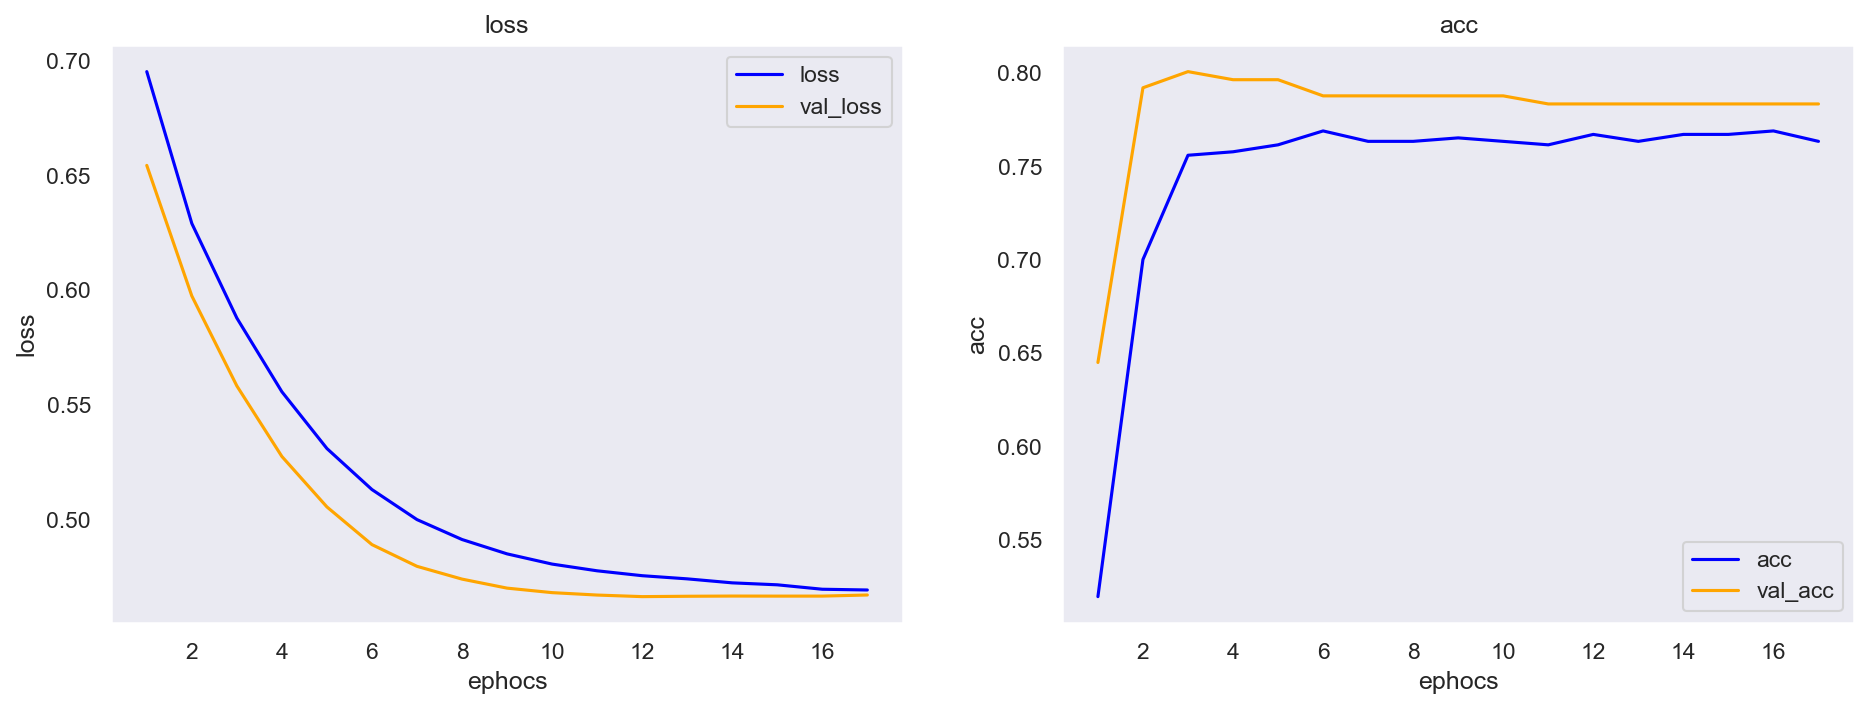

17/17 [==============================] - 0s 1ms/step - loss: 0.4681 - acc: 0.7691
최종 훈련 손실률: 0.468134, 최종 훈련 정확도: 0.769088
8/8 [==============================] - 0s 1ms/step - loss: 0.4671 - acc: 0.7835
최종 훈련 손실률: 0.467139, 최종 훈련 정확도: 0.783550


In [41]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate2[0], evaluate2[1]))

In [42]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(train_pred)

17/17 [==============================] - 0s 877us/step
537개의 훈련 데이터가 1개의 경우의 수를 갖는다.
[[0.8219345 ]
 [0.7131584 ]
 [0.15195864]
 [0.12289742]
 [0.3443441 ]
 [0.11306819]
 [0.18583255]
 [0.3238509 ]
 [0.5790455 ]
 [0.21064147]
 [0.5800263 ]
 [0.37821624]
 [0.48538646]
 [0.00207732]
 [0.7605858 ]
 [0.5755162 ]
 [0.14151388]
 [0.33588693]
 [0.04351078]
 [0.11953564]
 [0.14806862]
 [0.17685966]
 [0.463488  ]
 [0.41465005]
 [0.25326046]
 [0.17162895]
 [0.22050613]
 [0.0396716 ]
 [0.4660509 ]
 [0.07426051]
 [0.29721573]
 [0.2725995 ]
 [0.31518596]
 [0.68225884]
 [0.8426931 ]
 [0.76230264]
 [0.030504  ]
 [0.40228447]
 [0.71370006]
 [0.18625547]
 [0.27431923]
 [0.19331503]
 [0.03968883]
 [0.10494968]
 [0.04373674]
 [0.67422795]
 [0.47448093]
 [0.5213339 ]
 [0.1903309 ]
 [0.5738716 ]
 [0.08110672]
 [0.02848104]
 [0.24110727]
 [0.35477492]
 [0.21379119]
 [0.7343004 ]
 [0.17371441]
 [0.8374069 ]
 [0.34478757]
 [0.33861682]
 [0.07175478]
 [0.85803545]
 [0.08246892]
 [0.69851893]
 [0.05581276]
 [0.5

In [43]:
kdf = DataFrame({
    '결과값': y_train['Outcome'].values,
    '예측치' : np.round(train_pred.flatten()),
    'Outcome': np.round(train_pred.flatten() * 100, 1)
})

kdf

,결과값,예측치,Outcome
0,0,1.0,82.199997
1,1,1.0,71.300003
2,1,0.0,15.200000
3,0,0.0,12.300000
4,0,0.0,34.400002
...,...,...,...
532,0,1.0,69.099998
533,0,0.0,39.200001
534,0,0.0,6.000000
535,0,0.0,9.600000


In [44]:
cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
cmdf1 = DataFrame([[tn, fn], [fp, tp]], index=['True', 'False'], columns=['Negative', 'Positive'])
cmdf1

292 49 75 121


,Negative,Positive
True,292,75
False,49,121
